<a href="https://colab.research.google.com/github/Vopiyo/First-Repository/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Over the past two decades, there has been a monumental shift in how people
access and consume video content. With universal accessto broadband
internet, numerous platforms like **YouTube, Netflix, HBO Go** emerged and
steadily grew to prominence.

Although not a household name, OTT isthe exact technology that made the
streaming revolution possible.

OTT standsfor Over the Top, refersto any video streaming service delivering
content to the users over the internet, however there are subscription charges
associated with the usage of such platforms such as Prime Video, Netflix, Hot
Start, Zee5, Sony Liv etc.

But choosing your next movie to watch can still be a daunting task, even if you
have access to all the platforms.

“MyNextMovie” is a budding startup in the space of recommendations on top
of various OTT platforms providing suggestions to its customer base regarding
their next movie.

Their major business is to create a recommendation layer on top of these OTT
platformsso that they can make suitable recommendationsto their customers,
However,since they are in research mode right now, they would want to
experiment with open source data first to understand the depth of the models
which can be delivered by them.

The data for this exercise is open-source data which has been collected and
made available from the MovieLens web site (http://movielens.org), a part of
GroupLens

Research The data sets were collected over various periods of time, depending
on the size of the set.

You have recently joined as a Data Scientist at “MyNextMovie” and plan to
help the existing team to set up a recommendation platform.

https://www.kaggle.com/code/ayushimishra2809/movie-recommendation-system/data
?select=ratings.csv



Objective
Create a popularity based recommender system at a genre level. User will
input a genre (g), minimum ratings threshold (t) for a movie and no. of
recommendations(N) for which it should be recommended top N movies
which are most popular within that genre (g) ordered by ratingsin descending
order where each movie has at least (t) reviews.

Example:

**Input:**

**Genre (g) :** Comedy

**Minimum reviews threshold (t) :** 100

**Num recommendations (N) :** 5

**Output:**


Create a content-based recommendersystem which recommendstop N
movies based on similar movie(m) genres.

Create a collaborative based recommendersystem which recommendstop N
movies based on “K” similar users for a target user “u”



# **Data Description**

The data consists of 105339 ratings applied to over 10329 movies. The average
rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively. There
are 668 users who have given their ratings for 149532 movies.

There are two data files which are provided:

**Movies.csv**
movieId: ID assigned to a movie.

title: Title of a movie

genres: pipe separated list of movie genres.

**Ratings.csv**

userId: ID assigned to a user

movieId: ID assigned to a movie

rating: rating by a user to a movie

Timestamp: time at which the rating was provided.

# **Steps and Tasks**

Import libraries and load datase

**Exploratory Data Analysis including:**

Understanding of distribution of the features available.

Finding unique users and movies.

Average rating and Total movies at genre level.

Unique genres considered.

Design the 3 different types of recommendation modules as mentioned in
objectives.

Additional/Optional: Create a GUI interface using Python libraries
(ipywidgets etc.) to play around with the recommendation modules

In [ ]:
import pandas as pd
import numpy as np
# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Display the first few rows of each DataFrame
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


# **Step 2: Exploratory Data Analysis (EDA)**
**Understanding Distribution of Features**

In [ ]:
# Check the shape of the datasets
print(f'Movies shape: {movies.shape}')
print(f'Ratings shape: {ratings.shape}')

Movies shape: (10329, 3)
Ratings shape: (105339, 4)


In [ ]:
# Check for unique users and movies
unique_users = ratings['userId'].nunique()
unique_movies = movies['movieId'].nunique()
print(f'Unique Users: {unique_users}, Unique Movies: {unique_movies}')

Unique Users: 668, Unique Movies: 10329


# **Demographic Filtering -**
Before getting started with this -

we need a metric to score or rate a movie

Calculate the score for every movie

Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.

So, I'll be using IMDB's weighted rating (wr) which is given as :-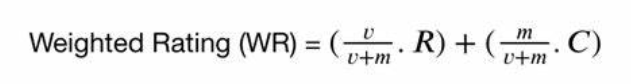

where,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie; And

C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [ ]:
# Average rating and total movies at genre level
average_rating = ratings['rating'].mean()
total_movies = movies.shape[0]
print(f'Average Rating: {average_rating}, Total Movies: {total_movies}')

Average Rating: 3.5168503593161127, Total Movies: 10329


So, the mean rating for all the movies is approx 3.5 on a scale of 5.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [ ]:
# Unique genres considered
unique_genres = set('|'.join(movies['genres']).split('|'))
print(f'Unique Genres: {len(unique_genres)}')

Unique Genres: 20


# Average Rating and Total Movies at Genre Level

In [ ]:
# Split genres into separate rows for analysis
genre_counts = movies['genres'].str.get_dummies(sep='|').sum()
average_rating_per_genre = ratings.merge(movies, on='movieId').groupby('genres')['rating'].mean()
total_movies_per_genre = ratings.merge(movies, on='movieId').groupby('genres')['movieId'].count()

genre_summary = pd.DataFrame({
    'Average Rating': average_rating_per_genre,
    'Total Movies': total_movies_per_genre,
})

print(genre_summary)

                                     Average Rating  Total Movies
genres                                                           
(no genres listed)                         3.071429             7
Action                                     2.836406           217
Action|Adventure                           3.739804           613
Action|Adventure|Animation                 4.125000            12
Action|Adventure|Animation|Children        3.550000            10
...                                             ...           ...
Sci-Fi|Thriller|IMAX                       3.500000             6
Thriller                                   3.473430           828
Thriller|War                               3.500000             7
War                                        3.613636            22
Western                                    3.500000           201

[938 rows x 2 columns]


# **Step 3: Design the Recommendation Module**

**Popularity-Based Recommendation Function**

In [ ]:
def recommend_movies(genre, min_ratings_threshold, n_recommendations):
    # Merge ratings with movies to filter by genre
    genre_filtered = ratings.merge(movies[movies['genres'].str.contains(genre)], on='movieId')
  # Group by movieId to get average rating and count of ratings
    popularity = genre_filtered.groupby('movieId').agg(
        average_rating=('rating', 'mean'),
        rating_count=('rating', 'count')
    ).reset_index()

    # Filter based on minimum ratings threshold
    popular_movies = popularity[popularity['rating_count'] >= min_ratings_threshold]
    # Sort by average rating in descending order and get top N recommendations
    recommendations = popular_movies.sort_values(by='average_rating', ascending=False).head(n_recommendations)

    # Merge with movies to get titles
    recommended_movies = recommendations.merge(movies[['movieId', 'title']], on='movieId')

    return recommended_movies[['title', 'average_rating', 'rating_count']]

# Example usage:
genre_input = "Action"  # User input for genre
min_ratings_input = 50  # User input for minimum ratings threshold
n_recommendations_input = 5  # User input for number of recommendations

recommended_movies = recommend_movies(genre_input, min_ratings_input, n_recommendations_input)
print(recommended_movies)

                                               title  average_rating  \
0           Princess Mononoke (Mononoke-hime) (1997)        4.384615   
1                          North by Northwest (1959)        4.273973   
2                                 Matrix, The (1999)        4.264368   
3  Star Wars: Episode V - The Empire Strikes Back...        4.228070   
4        Seven Samurai (Shichinin no samurai) (1954)        4.217742   

   rating_count  
0            52  
1            73  
2           261  
3           228  
4            62  


# Additional/Optional: Create a GUI Interface

For creating a simple GUI interface, you can use libraries like ipywidgets or tkinter. Here’s a basic example using ipywidgets:

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define widgets for user input
genre_widget = widgets.Text(value='Action', description='Genre:')
min_ratings_widget = widgets.IntSlider(value=50, min=1, max=1000, description='Min Ratings:')
n_recommendations_widget = widgets.IntSlider(value=5, min=1, max=20, description='Recommendations:')

# Display widgets
display(genre_widget, min_ratings_widget, n_recommendations_widget)

def on_button_click(b):
    recommendations = recommend_movies(genre_widget.value, min_ratings_widget.value, n_recommendations_widget.value)
    print(recommendations)

button = widgets.Button(description="Get Recommendations")
button.on_click(on_button_click)
display(button)

Text(value='Action', description='Genre:')

IntSlider(value=50, description='Min Ratings:', max=1000, min=1)

IntSlider(value=5, description='Recommendations:', max=20, min=1)

Button(description='Get Recommendations', style=ButtonStyle())

                                               title  average_rating  \
0           Princess Mononoke (Mononoke-hime) (1997)        4.384615   
1                          North by Northwest (1959)        4.273973   
2                                 Matrix, The (1999)        4.264368   
3  Star Wars: Episode V - The Empire Strikes Back...        4.228070   
4        Seven Samurai (Shichinin no samurai) (1954)        4.217742   

   rating_count  
0            52  
1            73  
2           261  
3           228  
4            62  
